In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

In [2]:
warnings.filterwarnings("ignore")

In [3]:
india_daily = pd.read_csv('data/India_daily_return.csv',index_col=0)
india_weekly = pd.read_csv('data/India_weekly_return.csv',index_col=0)
india_monthly = pd.read_csv('data/India_monthly_return.csv',index_col=0)


india_daily.index = pd.to_datetime(india_daily.index, format='%Y-%m-%d')
india_weekly.index = pd.to_datetime(india_weekly.index, format='%Y-%m-%d')
india_monthly.index = pd.to_datetime(india_monthly.index, format='%Y-%m-%d')
india_daily.head()

,Price,Open,High,Low,Vol.,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2015-05-20,1472.0,1470.0,1476.0,1466.0,0.28,0.00,0.0000
2015-05-21,1496.0,1496.0,1514.0,1493.0,5.47,1.63,2.6569
2015-05-22,1489.0,1502.0,1502.0,1487.0,4.38,-0.47,0.2209
2015-05-25,1473.0,1484.0,1490.0,1468.0,5.96,-1.07,1.1449
2015-05-26,1482.0,1469.0,1485.0,1469.0,7.93,0.61,0.3721


In [4]:
us_daily = pd.read_csv('data/US_daily_return.csv',index_col=0)
us_weekly = pd.read_csv('data/US_weekly_return.csv',index_col=0)
us_monthly = pd.read_csv('data/US_monthly_return.csv',index_col=0)


us_daily.index = pd.to_datetime(us_daily.index, format='%Y-%m-%d')
us_weekly.index = pd.to_datetime(us_weekly.index, format='%Y-%m-%d')
us_monthly.index = pd.to_datetime(us_monthly.index, format='%Y-%m-%d')
us_daily.head()

,Open,High,Low,Close,Volume,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2000-09-21,296.0,296.0,292.00,293.75,4842,0.00,0.0000
2000-09-22,293.5,297.0,293.25,295.50,3945,0.60,0.3600
2000-09-25,297.5,300.0,297.00,299.50,5073,1.35,1.8225
2000-09-26,301.0,303.5,299.75,302.00,9180,0.83,0.6889
2000-09-27,301.5,308.0,301.00,307.75,11145,1.90,3.6100


In [5]:
def model(data, p, q, mean='Constant'):
    df = data.iloc[:, -1]
    
    garch = arch_model(df, vol='GARCH', p=p, q=q, mean=mean)
    garch = garch.fit(disp='off')
    residuals = garch.resid
    std_residuals = garch.std_resid
    
    return garch.summary(), residuals, std_residuals

### ADF Test

In [6]:
result = adfuller(india_daily['Daily Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -32.815660544041926
p-value: 0.0


In [ ]:
result = adfuller(india_weekly['Weekly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.982036209427324
p-value: 8.997601312293068e-30


In [8]:
result = adfuller(india_monthly['Monthly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.921573157063959
p-value: 5.017938243248519e-22


In [9]:
result = adfuller(us_daily['Daily Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -75.5922172220999
p-value: 0.0


In [10]:
result = adfuller(us_weekly['Weekly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -35.81176621104672
p-value: 0.0


In [11]:
result = adfuller(us_monthly['Monthly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.087250489683207
p-value: 5.300011692598084e-29


### India

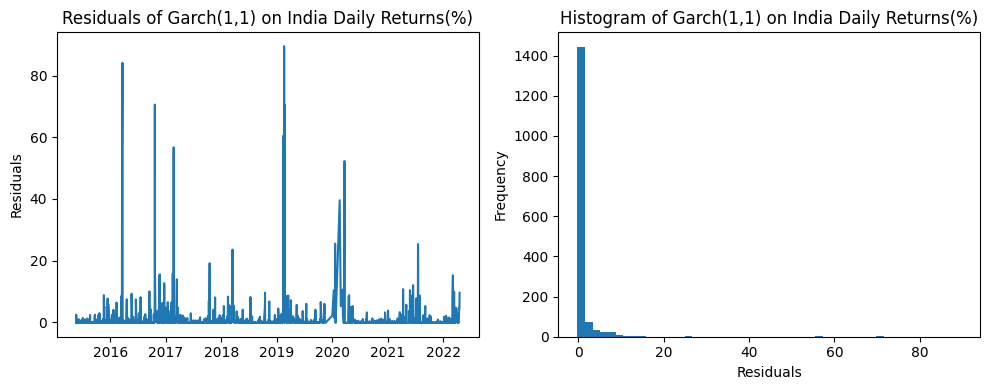

In [ ]:
df, residuals, std_residuals = model(india_daily, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on India Daily Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on India Daily Returns(%)')
plt.tight_layout()
plt.show()

In [ ]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:     Daily Change (%) Squared   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -4125.31
Distribution:                        Normal   AIC:                           8258.62
Method:                  Maximum Likelihood   BIC:                           8280.21
                                              No. Observations:                 1629
Date:                      Fri, Sep 27 2024   Df Residuals:                     1628
Time:                              17:06:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2491      0.182      1.367      0.171 [ -0.108,  0.606]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.9625      1.461      0.659      0.510   [ -1.901,  3.826]
alpha[1]       0.3247      0.115      2.815  4.880e-03 [9.861e-02,  0.551]
beta[1]        0.6753      0.117      5.756  8.635e-09   [  0.445,  0.905]
==========================================================================

Covariance estimator: robust
"""

- Alpha[1] and Beta[1] both are significant
- Constant Mean Model is not statistically significant

d:\Quant Trading\Volatility_Prediction\.venv\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


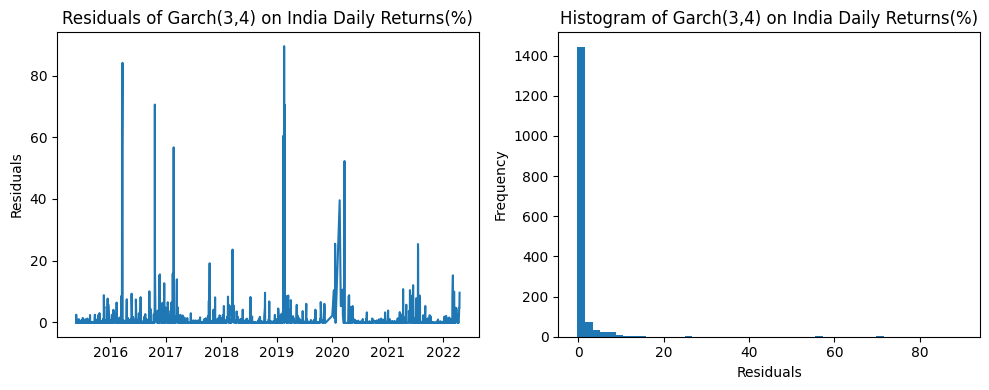

In [16]:
df, residuals, std_residuals = model(india_daily, 3, 4, 'AR')

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(3,4) on India Daily Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(3,4) on India Daily Returns(%)')
plt.tight_layout()
plt.show()

In [15]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:     Daily Change (%) Squared   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -4098.49
Distribution:                        Normal   AIC:                           8214.98
Method:                  Maximum Likelihood   BIC:                           8263.54
                                              No. Observations:                 1629
Date:                      Sat, Oct 12 2024   Df Residuals:                     1628
Time:                              11:00:33   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.2584      0.219      1.178      0.239 [ -0.172,  0.688]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.2117      0.840      1.442      0.149   [ -0.435,  2.859]
alpha[1]       0.2513      0.124      2.032  4.216e-02 [8.903e-03,  0.494]
alpha[2]       0.2240      1.859      0.120      0.904   [ -3.420,  3.868]
alpha[3]       0.0152      1.641  9.231e-03      0.993   [ -3.202,  3.232]
beta[1]        0.4263      4.231      0.101      0.920   [ -7.867,  8.719]
beta[2]    1.6919e-07      7.962  2.125e-08      1.000   [-15.605, 15.605]
beta[3]    1.6318e-07      5.300  3.079e-08      1.000   [-10.388, 10.388]
beta[4]        0.0834      1.346  6.195e-02      0.951   [ -2.554,  2.721]
==========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

- AIC and BIC are similar in Garch(1,1) and Garch(3,4)

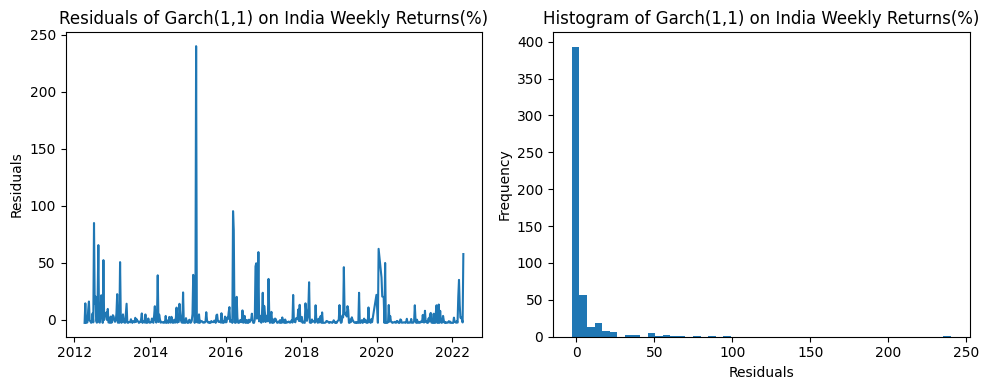

In [ ]:
df, residuals, std_residuals = model(india_weekly, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on India Weekly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on India Weekly Returns(%)')
plt.tight_layout()
plt.show()

In [ ]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                         
=====================================================================================
Dep. Variable:     Weekly Change (%) Squared   R-squared:                       0.000
Mean Model:                    Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GARCH   Log-Likelihood:               -2091.70
Distribution:                         Normal   AIC:                           4191.40
Method:                   Maximum Likelihood   BIC:                           4208.37
                                               No. Observations:                  514
Date:                       Fri, Sep 27 2024   Df Residuals:                      513
Time:                               17:06:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.8345      2.075      1.366      0.172 [ -1.233,  6.902]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         31.9894     39.406      0.812      0.417 [-45.245,1.092e+02]
alpha[1]       0.3247      0.339      0.957      0.339   [ -0.341,  0.990]
beta[1]        0.6753      0.104      6.489  8.623e-11   [  0.471,  0.879]
==========================================================================

Covariance estimator: robust
"""

- Beta[1] is significant
- Alpha[1] is not significant
- Constant Mean Model is not statistically significant

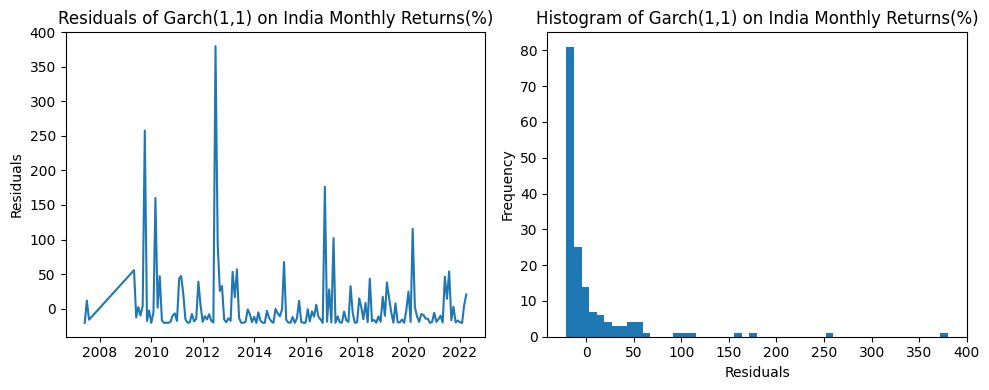

In [ ]:
df, residuals, std_residuals = model(india_monthly, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on India Monthly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on India Monthly Returns(%)')
plt.tight_layout()
plt.show()

In [ ]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                          
======================================================================================
Dep. Variable:     Monthly Change (%) Squared   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:                              GARCH   Log-Likelihood:               -821.994
Distribution:                          Normal   AIC:                           1651.99
Method:                    Maximum Likelihood   BIC:                           1664.26
                                                No. Observations:                  159
Date:                        Fri, Sep 27 2024   Df Residuals:                      158
Time:                                17:06:19   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            20.7510      3.360      6.175  6.606e-10 [ 14.165, 27.337]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.3037e-05     31.332  7.352e-07      1.000      [-61.410, 61.410]
alpha[1]   6.1242e-08  1.527e-02  4.012e-06      1.000 [-2.992e-02,2.992e-02]
beta[1]        0.9877  1.442e-02     68.519      0.000      [  0.959,  1.016]
=============================================================================

Covariance estimator: robust
"""

- Alpha[1] and Beta[1] both are not significant
- Constant Mean Model is  statistically significant

### US

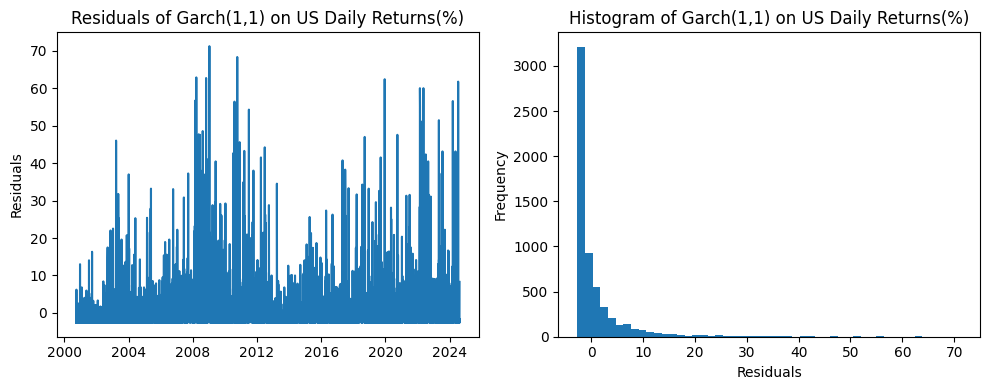

In [65]:
df, residuals, std_residuals = model(us_daily, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on US Daily Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on US Daily Returns(%)')
plt.tight_layout()
plt.show()

In [66]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:     Daily Change (%) Squared   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -19242.9
Distribution:                        Normal   AIC:                           38493.9
Method:                  Maximum Likelihood   BIC:                           38520.7
                                              No. Observations:                 6014
Date:                      Fri, Sep 27 2024   Df Residuals:                     6013
Time:                              17:16:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.6804      0.118     22.666 9.622e-114 [  2.449,  2.912]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0844  7.682e-02      1.098      0.272  [-6.621e-02,  0.235]
alpha[1]       0.0145  5.841e-03      2.488  1.283e-02 [3.087e-03,2.598e-02]
beta[1]        0.9846  6.843e-03    143.881      0.000     [  0.971,  0.998]
============================================================================

Covariance estimator: robust
"""

- Alpha[1] and Beta[1] both are significant
- Constant Mean Model is statistically significant

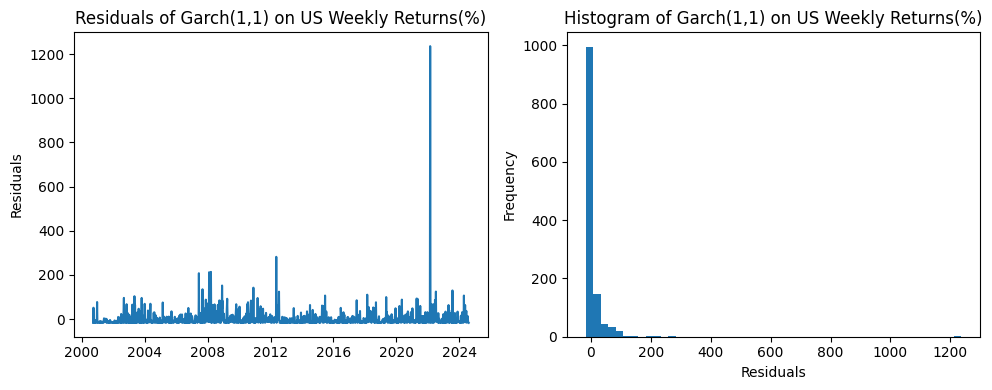

In [67]:
df, residuals, std_residuals = model(us_weekly, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on US Weekly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on US Weekly Returns(%)')
plt.tight_layout()
plt.show()

In [68]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                         
=====================================================================================
Dep. Variable:     Weekly Change (%) Squared   R-squared:                       0.000
Mean Model:                    Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             GARCH   Log-Likelihood:               -6504.42
Distribution:                         Normal   AIC:                           13016.8
Method:                   Maximum Likelihood   BIC:                           13037.3
                                               No. Observations:                 1248
Date:                       Fri, Sep 27 2024   Df Residuals:                     1247
Time:                               17:16:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            17.5709      1.288     13.639  2.350e-42 [ 15.046, 20.096]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        985.8842   1226.478      0.804      0.421 [-1.418e+03,3.390e+03]
alpha[1]   9.3997e-04  9.976e-04      0.942      0.346 [-1.015e-03,2.895e-03]
beta[1]        0.4992      0.369      1.354      0.176      [ -0.223,  1.222]
=============================================================================

Covariance estimator: robust
"""

- Alpha[1] and Beta[1] both are not significant
- Constant Mean Model is  statistically significant

d:\Quant Trading\Volatility_Prediction\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.132e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


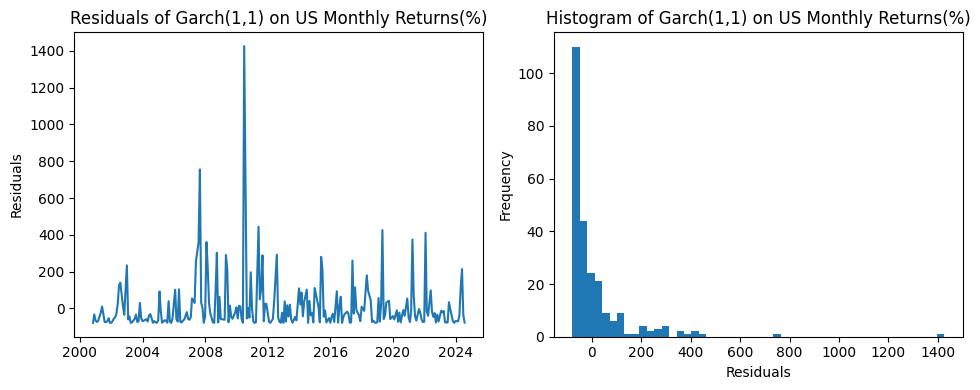

In [69]:
df, residuals, std_residuals = model(us_monthly, 1, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Garch(1,1) on US Monthly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Garch(1,1) on US Monthly Returns(%)')
plt.tight_layout()
plt.show()

In [70]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - GARCH Model Results                          
======================================================================================
Dep. Variable:     Monthly Change (%) Squared   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:                              GARCH   Log-Likelihood:               -1568.59
Distribution:                          Normal   AIC:                           3145.19
Method:                    Maximum Likelihood   BIC:                           3159.21
                                                No. Observations:                  246
Date:                        Fri, Sep 27 2024   Df Residuals:                      245
Time:                                17:16:46   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            78.7639     11.873      6.634  3.266e-11 [ 55.494,1.020e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        683.0899   1008.299      0.677      0.498 [-1.293e+03,2.659e+03]
alpha[1]   1.2511e-13  4.990e-02  2.507e-12      1.000 [-9.781e-02,9.781e-02]
beta[1]        0.9711  9.506e-02     10.215  1.700e-24      [  0.785,  1.157]
=============================================================================

Covariance estimator: robust
"""

- Alpha[1] is not significant 
- Beta[1] is significant
- Constant Mean Model is statistically significant